# 1 - El problema del café

In [16]:
reset()

In [17]:
Xt=[0,30,60,90]
Xt

[0, 30, 60, 90]

In [18]:
YT=[85,73,64,58]
YT

[85, 73, 64, 58]

In [19]:
Te=15

In [20]:
dT=[(YT[i+1]-YT[i])/(Xt[i+1]-Xt[i]) for i in range(0,len(Xt)-1)]
dT

[-2/5, -3/10, -1/5]

In [21]:
k_aprox=[-dT[i]/(YT[i]-Te) for i in range(0,len(dT))]
k_aprox

[1/175, 3/580, 1/245]

In [22]:
print("Taula:\nt\tT(t)\t T'(t)\t-T'(t)/(T(t)-T_e)")
for i in range(0,len(dT)):
    print(Xt[i],"\t",YT[i],"\t",dT[i],"\t    ",k_aprox[i])

Taula:
t	T(t)	 T'(t)	-T'(t)/(T(t)-T_e)
0 	 85 	 -2/5 	     1/175
30 	 73 	 -3/10 	     3/580
60 	 64 	 -1/5 	     1/245


In [23]:
k=mean(k_aprox).n()
k

0.00498944405348346

In [24]:
var('t')
T=function('T')(t)

In [25]:
odesol=desolve(diff(T,t)==-k*(T-Te),[T,t],[Xt[0],YT[0]])
T1=odesol.expand()
T1

70*e^(-709/142100*t) + 15

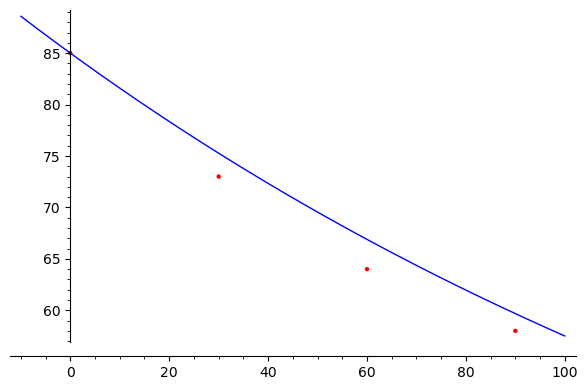

In [26]:
punts=points([[Xt[i],YT[i]] for i in range(0,len(Xt))],color='red')
corba=plot(T1,xmin=-10,xmax=100)
punts+corba

In [27]:
# Prenem k=k_aprox[0]
k=k_aprox[0]

In [28]:
odesol=desolve(diff(T,t)==-k*(T-Te),[T,t],[Xt[0],YT[0]])
T11=odesol.expand()
T11

70*e^(-1/175*t) + 15

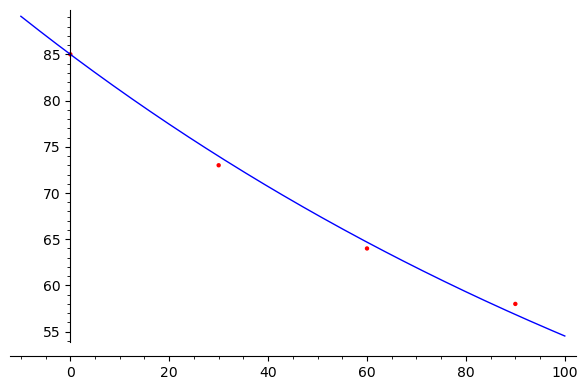

In [29]:
corba1=plot(T11,xmin=-10,xmax=100)
punts+corba1

Obtenim millors resultats.

In [30]:
T1(5*60).n()

30.6686519621892

In [31]:
Tc=35
sol=find_root(T1==35,0,60*5)
sol

251.08267676049616

In [32]:
minuts=sol/60
minuts

4.184711279341602

# 2 - El problema de mantenir el café calent

In [33]:
reset('k')

In [34]:
var('k')

k

In [35]:
odesol=desolve(diff(T,t)==-k*(T-Te),[T,t],[Xt[0],YT[0]])
T2=odesol.expand()
T2

70*e^(-k*t) + 15

In [36]:
k_nova=find_root(T2(t=10*60)==30,-10,10)
k_nova

0.0025674084015785813

In [37]:
k=mean(k_aprox).n()

In [38]:
var('q')

q

In [39]:
odesol=desolve(diff(T,t)==q-k*(T-Te),[T,t],[Xt[0],YT[0]])
T22=odesol.expand()
T22

-142100/709*q*e^(-709/142100*t) + 142100/709*q + 70*e^(-709/142100*t) + 15

In [40]:
q_min=find_root(T22(t=10*60)==30,-10,10)
q_min

0.060367089801502516

In [41]:
q2_min=find_root(limit(T22,t=oo)==30,-10,10)
q2_min

0.0748416608022513

# 3 - El problema del café amb gel

In [42]:
var('c')
q=c/(t+1)

In [47]:
ode_rhs=q-k*(T-Te)
ode_rhs

c/(t + 1) - 0.00498944405348346*T(t) + 0.0748416608022519

In [48]:
# triem c=-2
ode_rhs1=(ode_rhs).subs(c=-2)
ode_rhs1

-2/(t + 1) - 0.00498944405348346*T(t) + 0.0748416608022519

In [51]:
# amb c=-2
odesol_num1=desolve_rk4(diff(T,t)==ode_rhs1,T,ics=[Xt[0],YT[0]], step=0.1, end_points=300);
odesol_num1

[[0, 85],
 [0.1, 84.77451041503984],
 [0.2, 84.56572669640956],
 [0.3, 84.37098091694207],
 [0.4, 84.18819873234422],
 [0.5, 84.01573532304127],
 [0.6000000000000001, 83.85226437842509],
 [0.7000000000000001, 83.69670078678331],
 [0.8, 83.54814544967819],
 [0.9, 83.40584503186987],
 [1.0, 83.2691620437827],
 [1.1, 83.13755222809128],
 [1.2, 83.01054720956297],
 [1.3, 82.887741003119],
 [1.4, 82.76877939411895],
 [1.5, 82.65335148689756],
 [1.6, 82.54118291101986],
 [1.7, 82.43203030969609],
 [1.8, 82.3256768304693],
 [1.9, 82.22192840707959],
 [2.0, 82.1206106715301],
 [2.1, 82.02156637234492],
 [2.2, 81.92465320257936],
 [2.3, 81.82974196192342],
 [2.4, 81.7367149930541],
 [2.5, 81.64546484453803],
 [2.6, 81.55589312199392],
 [2.7, 81.46790949656868],
 [2.8, 81.38143084555924],
 [2.9, 81.29638050458807],
 [3.0, 81.2126876143904],
 [3.1, 81.13028654819901],
 [3.2, 81.04911640807684],
 [3.3, 80.96912058046611],
 [3.4, 80.89024634278847],
 [3.5, 80.8124445142153],
 [3.6, 80.7356691447854

In [53]:
# amb c=0
odesol_num2=desolve_rk4(diff(T,t)==ode_rhs.subs(c=0),T,ics=[Xt[0],YT[0]], step=0.1, end_points=300);
odesol_num2

[[0, 85],
 [0.1, 84.96508260326986],
 [0.2, 84.93018262403393],
 [0.3, 84.89530005360402],
 [0.4, 84.86043488329625],
 [0.5, 84.82558710443111],
 [0.6000000000000001, 84.79075670833339],
 [0.7000000000000001, 84.75594368633223],
 [0.8, 84.72114802976108],
 [0.9, 84.68636972995772],
 [1.0, 84.65160877826423],
 [1.1, 84.61686516602705],
 [1.2, 84.5821388845969],
 [1.3, 84.54742992532883],
 [1.4, 84.51273827958221],
 [1.5, 84.4780639387207],
 [1.6, 84.44340689411227],
 [1.7, 84.40876713712922],
 [1.8, 84.37414465914813],
 [1.9, 84.33953945154988],
 [2.0, 84.30495150571967],
 [2.1, 84.27038081304698],
 [2.2, 84.2358273649256],
 [2.3, 84.2012911527536],
 [2.4, 84.16677216793335],
 [2.5, 84.13227040187148],
 [2.6, 84.09778584597895],
 [2.7, 84.06331849167098],
 [2.8, 84.02886833036708],
 [2.9, 83.99443535349103],
 [3.0, 83.9600195524709],
 [3.1, 83.92562091873901],
 [3.2, 83.891239443732],
 [3.3, 83.85687511889076],
 [3.4, 83.82252793566042],
 [3.5, 83.78819788549042],
 [3.6, 83.753884959834

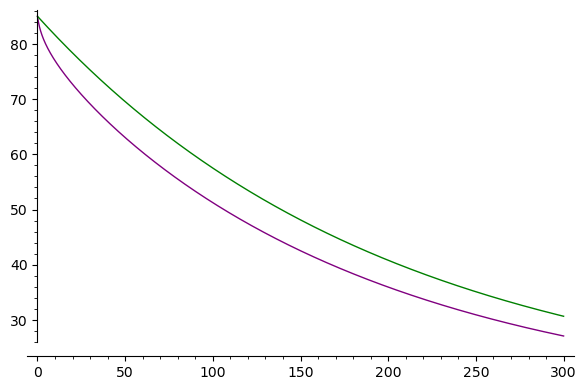

In [55]:
plot1=list_plot(odesol_num1, plotjoined=True, color="purple")
plot2=list_plot(odesol_num2, plotjoined=True, color="green")
plot1+plot2

# 4 - La temperatura d’un habitatge amb calefacció

In [75]:
reset("k")

In [76]:
var("Tmax Tmin w k")
Te=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*t)

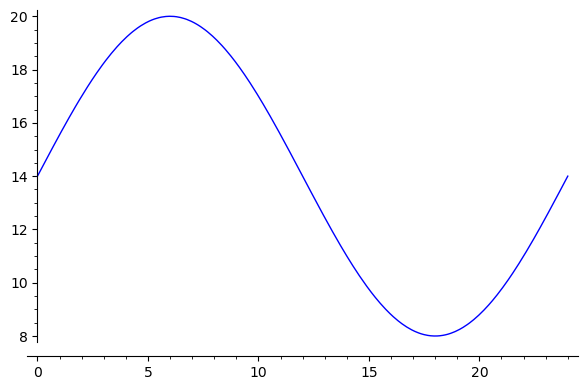

In [77]:
plot(Te.subs(Tmax=20,Tmin=8,w=pi/12),t,0,24)

t=0 correspon a les 8:00 aproximadament.

Modificacio de la funcio perque quadrin les hores t amb les hores del dia: 

Te=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*(t-8))

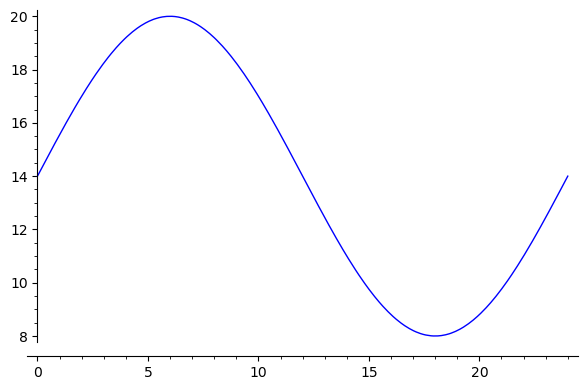

In [78]:
plot(Te.subs(Tmax=20,Tmin=8,w=pi/12),t,0,24)

In [81]:
var('T0 q')
T0=17

In [82]:
ode_rhs4=q-k*(T-Te)

In [86]:
odesol4=desolve(diff(T,t)==ode_rhs4.subs(Tmax=20,Tmin=8,w=pi/12,k=1.6,q=0.05),[T,t],[0,T0])
odesol4

1/32*(92160*pi - 92160*pi*cos(1/12*pi*t)*e^(8/5*t) + 2375*pi^2 + 449*(25*pi^2 + 9216)*e^(8/5*t) + 1769472*e^(8/5*t)*sin(1/12*pi*t) + 875520)*e^(-8/5*t)/(25*pi^2 + 9216)

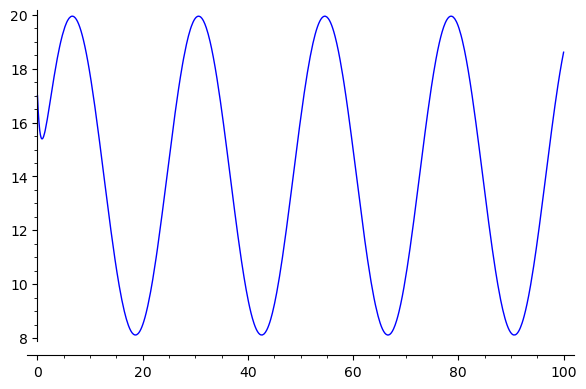

In [90]:
plot(odesol4,0,100)

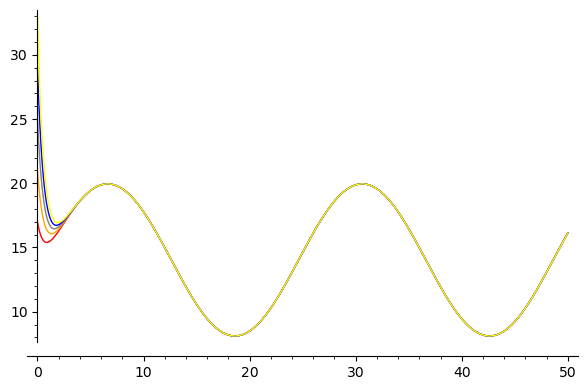

In [99]:
L=[]
colors=['red','orange','gray','blue','yellow']
for i in range(0,5):
    T0=17+4*i
    ode=desolve(diff(T,t)==ode_rhs4.subs(Tmax=20,Tmin=8,w=pi/12,k=1.6,q=0.05),[T,t],[0,T0])
    L.append(plot(ode,0,50,color=colors[i]))
sum(L)

In [124]:
T0=14

In [140]:
odesol6=desolve(diff(T,t)==ode_rhs4.subs(Tmax=20,Tmin=8,w=pi/12,k=1.6,q=0.05),[T,t],[0,T0])
odesol6

1/32*(92160*pi - 92160*pi*cos(1/12*pi*t)*e^(8/5*t) - 25*pi^2 + 449*(25*pi^2 + 9216)*e^(8/5*t) + 1769472*e^(8/5*t)*sin(1/12*pi*t) - 9216)*e^(-8/5*t)/(25*pi^2 + 9216)

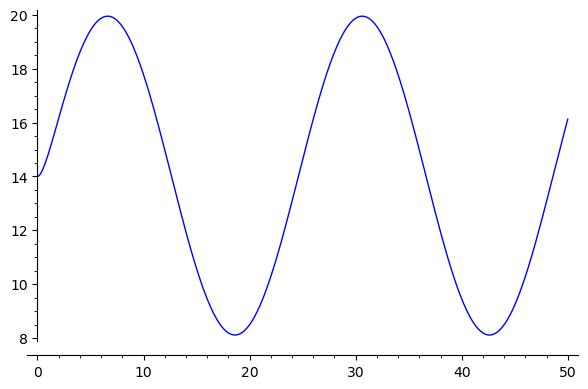

In [142]:
plot(odesol6,0,50)

In [143]:
print("Com que hi ha poca calor, l'amplitud maxima es:",Tmax-Tmin,"\b.")

Com que hi ha poca calor, l'amplitud maxima es: Tmax - Tmin .


In [145]:
T0=17

In [146]:
odesol7=desolve(diff(T,t)==ode_rhs4.subs(Tmax=20,Tmin=8,w=pi/12,q=0.05),[T,t],[0,T0])
odesol7

-1/20*(1440*pi*k^2*cos(1/12*pi*t)*e^(k*t) - 17280*k^3*e^(k*t)*sin(1/12*pi*t) - 60*pi^2*k - 144*(10*pi - 1)*k^2 - 8640*k^3 + pi^2 - (280*pi^2*k + 40320*k^3 + pi^2 + 144*k^2)*e^(k*t))*e^(-k*t)/(pi^2*k + 144*k^3)

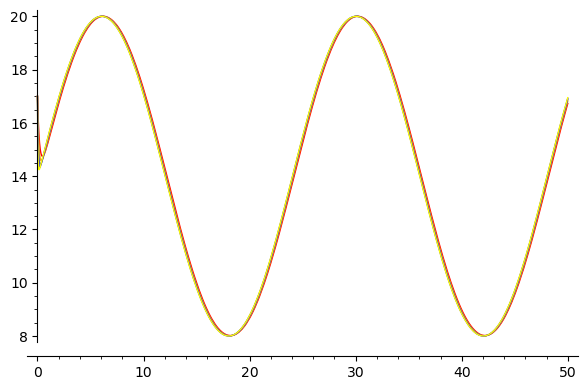

In [152]:
M=[]
colors=['red','orange','gray','blue','yellow']
for i in range(0,5):
    M.append(plot(odesol7.subs(k=5*1.5^i),0,50,color=colors[i]))
sum(M)

In [157]:
odesol71=limit(odesol7,k=0)
odesol71

1/20*t + 17

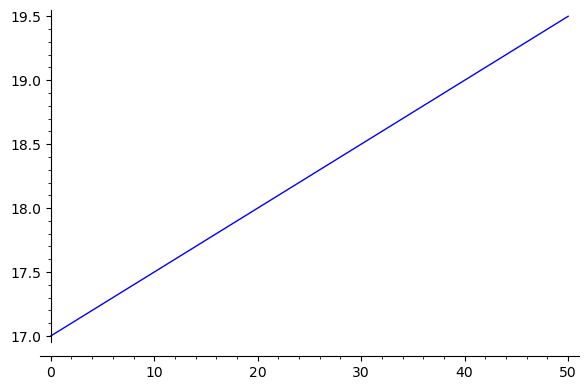

In [159]:
plot(odesol71,0,50)

In [158]:
assume(t>0)
odesol72=limit(odesol7,k=oo)
odesol72

6*sin(1/12*pi*t) + 14

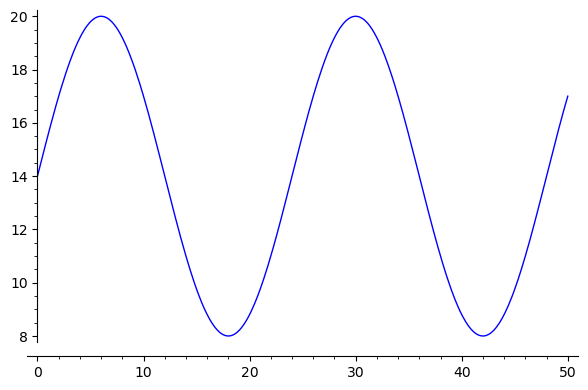

In [160]:
plot(odesol72,0,50)

In [4]:
var('t')
T=function('T')(t)

In [5]:
var("Tmax Tmin w k q T0")
Te=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*t)

In [15]:
T0=30
odesol_general=desolve(diff(T,t)==q-k*(T-Te),[T,t],[0,T0])
odesol_general

-1/2*((Tmax - Tmin)*k^2*w*cos(t*w)*e^(k*t) - (Tmax - Tmin)*k^3*e^(k*t)*sin(t*w) + (Tmax + Tmin - 60)*k^3 - (Tmax - Tmin)*k^2*w + 2*k^2*q + ((Tmax + Tmin - 60)*k - ((Tmax + Tmin)*k + 2*q)*e^(k*t) + 2*q)*w^2 - ((Tmax + Tmin)*k^3 + 2*k^2*q)*e^(k*t))/(k^3*e^(k*t) + k*w^2*e^(k*t))

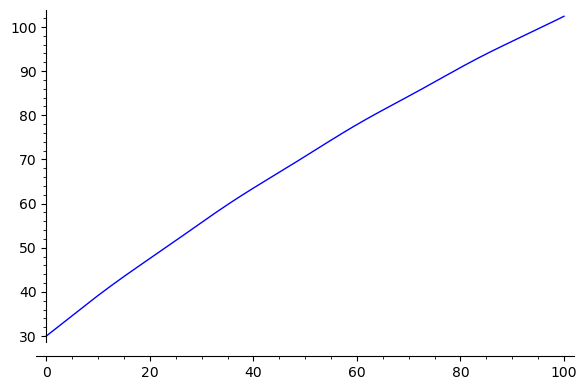

In [22]:
plot(odesol_general.subs(Tmax=20,Tmin=8,q=1,k=0.005,w=pi/12),0,100)

verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 61 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'math range error'


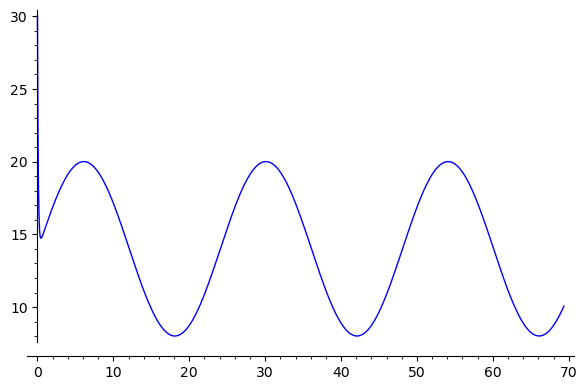

In [26]:
plot(odesol_general.subs(Tmax=20,Tmin=8,q=0.1,k=10,w=pi/12),0,100)